In [1]:
import geopandas as geopd
import pandas as pd

import numpy as np

import string

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["figure.dpi"]  = 300
plt.style.use('dark_background')

In [2]:
gauge_path = "/home/iielse/Documents/DIWA/data/omat digitoinnit/CAMELS-FI flow gauges.gpkg"
gauges = geopd.read_file(gauge_path, layer="attributes_v1")
gauges['water_region_id'] = gauges.water_region_code.apply(string.ascii_uppercase.index)
gauges = gauges.set_index('Paikka_Id')



natural_gauges_path = "colorbars/natural_order.csv"
natural_gauges = pd.read_csv(natural_gauges_path)
natural_sort = list(natural_gauges.columns)

unnatural_gauges_path = "colorbars/unnatural_order.csv"
unnatural_gauges = pd.read_csv(unnatural_gauges_path)
unnatural_sort = list(unnatural_gauges.columns)

gauge_order_path = "colorbars/order.csv"
gauge_order = pd.read_csv(gauge_order_path)
gauge_sort = list(gauge_order.columns)

sorted_gauges = gauges.loc[gauge_sort]
natural = gauges.loc[natural_sort]
unnatural = gauges.loc[unnatural_sort]

In [3]:
cmap= LinearSegmentedColormap.from_list('water_regions', ['#11548a', '#4CA9FF', '#ffffff'])

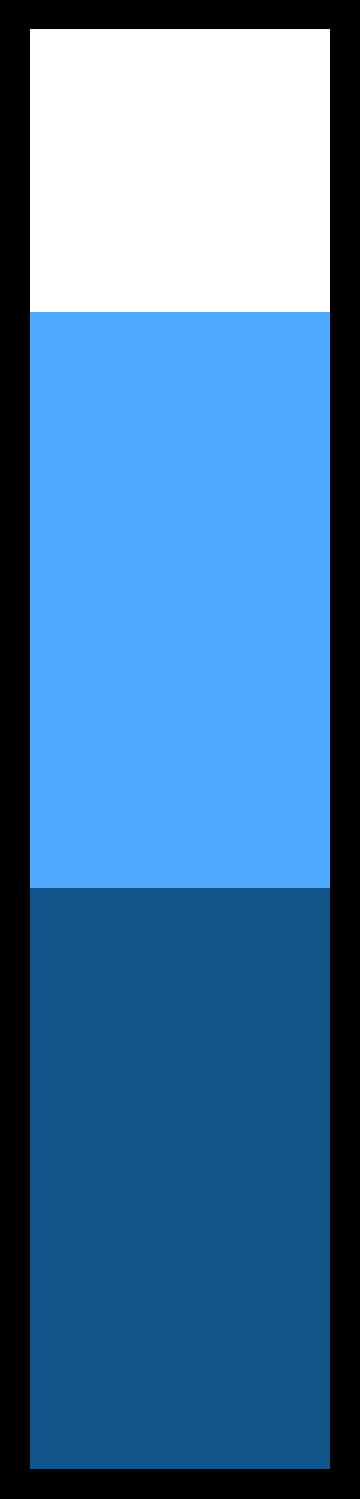

In [18]:


ax = plt.imshow(np.expand_dims(sorted_gauges.water_region_id, axis=1), aspect=0.015, cmap=cmap)
plt.axis('off')
plt.tight_layout(pad=0)
dst_path = 'colorbars/water_regions_sorted_all.png'
plt.savefig(dst_path, transparent=True, dpi=300)

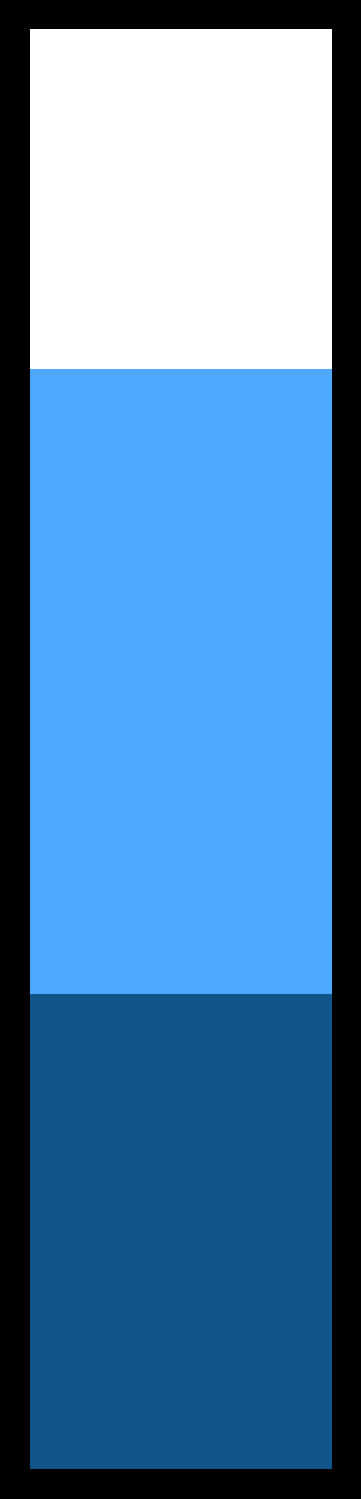

In [21]:
ax = plt.imshow(np.expand_dims(natural.water_region_id, axis=1), aspect=0.045, cmap=cmap)
plt.axis('off')
plt.tight_layout(pad=0)
dst_path = 'colorbars/water_regions_sorted_natural.png'
plt.savefig(dst_path, transparent=True, dpi=300)

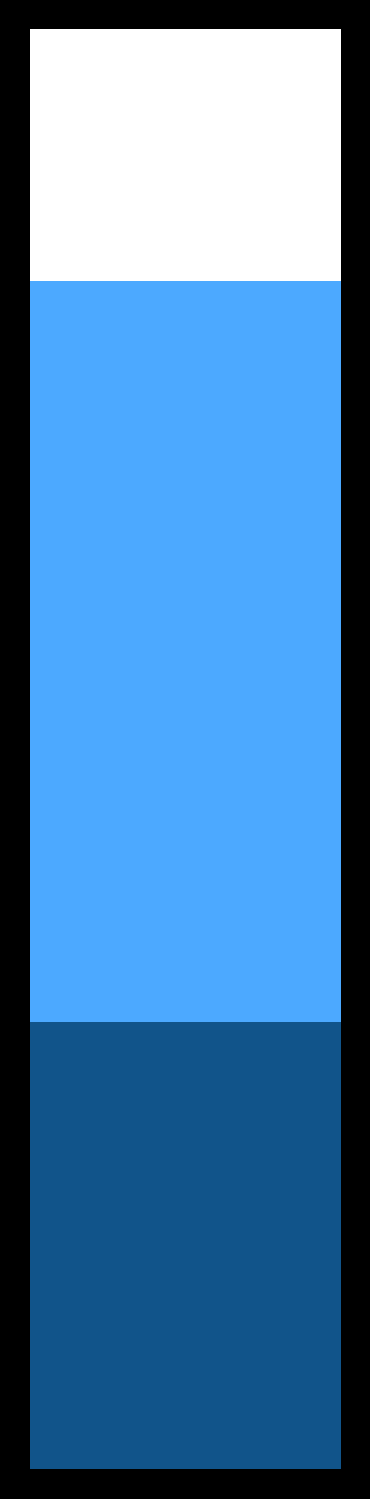

In [22]:
ax = plt.imshow(np.expand_dims(unnatural.water_region_id, axis=1), aspect=0.045, cmap=cmap)
plt.axis('off')
plt.tight_layout(pad=0)
dst_path = 'colorbars/water_regions_sorted_unnatural.png'
plt.savefig(dst_path, transparent=True, dpi=300)

In [7]:

sorted_gauges.water_region_code.value_counts()

water_region_code
A    129
B    128
C     63
Name: count, dtype: int64

In [8]:
natural.water_region_code.value_counts()

water_region_code
B    46
A    35
C    25
Name: count, dtype: int64

In [9]:
unnatural.water_region_code.value_counts()

water_region_code
B    53
A    32
C    18
Name: count, dtype: int64